In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# training data
age = np.array([25,55,27,35,60,65,45,40,50,30])
salary = np.array([135,260,105,220,240,265,270,300,265,105])*1000

In [3]:
data = pd.DataFrame([age,salary],index=["Age","Salary"]).T

In [4]:
data.sort_values(by="Age",inplace=True)  # 画线图需要

In [5]:
data

,Age,Salary
0,25,135000
2,27,105000
9,30,105000
3,35,220000
7,40,300000
6,45,270000
8,50,265000
1,55,260000
4,60,240000
5,65,265000


In [6]:
x = data["Age"]
y = data["Salary"]

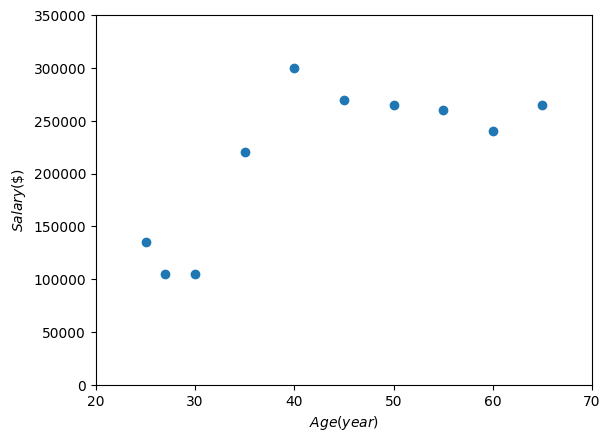

In [7]:
plt.scatter(x,y)
plt.xlim((20,70))
plt.ylim((0,350000))
plt.xlabel(r"$Age(year)$")
plt.ylabel(r"$Salary(\$)$")
plt.show()

In [8]:
# 不同回归次数

degs = np.arange(1,6)
regs = []  # 存系数
sses = []  # 存残差平方和,sum of squares due to error
for deg in degs:
    reg = np.polyfit(x,y, deg=deg, full=True)
    regs.append(reg[0])
    sses.append(reg[1])

In [9]:
regs  # 返回值的顺序为倒叙，如b5,b4,b3,b2,b1,b0

[array([ 3827.30520205, 51160.41527127]),
 array([-2.43288591e+02,  2.53771666e+04, -3.82171112e+05]),
 array([ 4.95418932e+00, -9.10652169e+02,  5.38603844e+04, -7.63999774e+05]),
 array([ 1.44700341e+00, -2.55709931e+02,  1.61107053e+04, -4.22004174e+05,
         4.02874457e+06]),
 array([-1.09355058e-01,  2.59925927e+01, -2.40364225e+03,  1.07539453e+05,
        -2.31216558e+06,  1.91984209e+07])]

In [10]:
sses

[array([2.22586682e+10]),
 array([9.76069865e+09]),
 array([9.20938699e+09]),
 array([4.28664043e+09]),
 array([1.49820159e+09])]

In [11]:
for i in range(1,len(regs)+1):
    ry = np.polyval(regs[i-1], x)  # 计算拟合y值
    col = "reg_{}".format(i)
    data[col] = ry

In [12]:
data

,Age,Salary,reg_1,reg_2,reg_3,reg_4,reg_5
0,25,135000,146843.045323,100202.683263,90761.437578,117599.052267,134965.391599
2,27,105000,154497.655727,125655.002926,123878.480992,115194.385607,99724.960602
9,30,105000,165979.571333,160184.153554,165987.916437,136158.724570,117292.624191
3,35,220000,185116.097343,208001.194288,217975.638763,202058.647399,213895.803158
7,40,300000,204252.623353,243653.805466,250440.246545,264599.205280,284897.913931
6,45,270000,223389.149364,267141.987086,267097.381774,294785.833904,293253.805515
8,50,265000,242525.675374,278465.739150,271662.686437,285329.020124,263742.043720
1,55,260000,261662.201384,277625.061657,267851.802524,250644.301955,241956.764398
4,60,240000,280798.727395,264619.954608,259380.372024,226852.268574,253299.526679
5,65,265000,299935.253405,239450.418001,249964.036926,271778.560322,261971.166208


In [13]:
x = data["Age"]
y = data["Salary"]
y_1 = data["reg_1"]
y_2 = data["reg_2"]
y_3 = data["reg_3"]
y_4 = data["reg_4"]
y_5 = data["reg_5"]

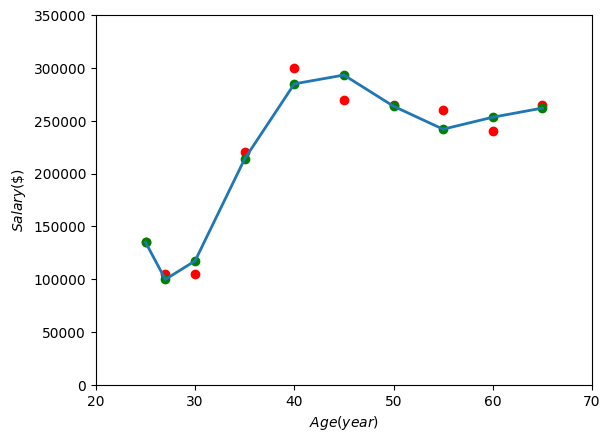

In [14]:
# 绘制五次方的图

plt.scatter(x,y,color='r')
plt.scatter(x,y_5,color='g') 
plt.plot(x,y_5,lw=2)    # 如何使线条变平滑
plt.xlim((20,70))
plt.ylim((0,350000))
plt.xlabel(r"$Age(year)$")
plt.ylabel(r"$Salary(\$)$")
plt.show()

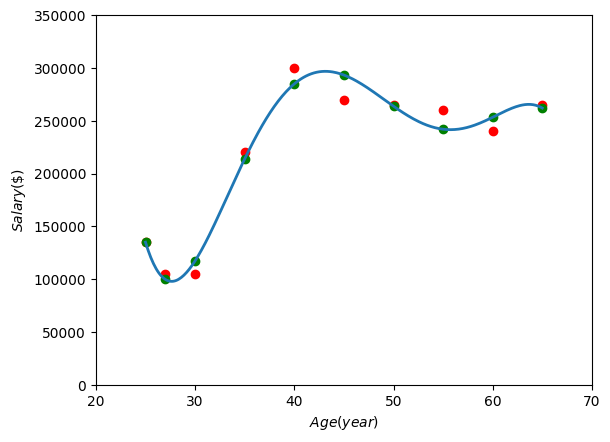

In [15]:
# 绘制五次方的平滑图

plt.scatter(x,y,color='r')
plt.scatter(x,y_5,color='g') 

poly = np.poly1d(regs[4])  # 用五次方拟合的参数
# 生成更多的x值用于绘制平滑曲线
xnew = np.linspace(x.min(), x.max(), 300)
ynew = poly(xnew)
plt.plot(xnew, ynew, lw=2)

plt.xlim((20,70))
plt.ylim((0,350000))
plt.xlabel(r"$Age(year)$")
plt.ylabel(r"$Salary(\$)$")
plt.show()

In [16]:
# 均方误差 Root mean squared error
n = len(x)
rmses = []
for sse in sses:
    rmses.append(np.sqrt(sse/(n-1)))

In [17]:
rmses

[array([49731.13068124]),
 array([32932.08272044]),
 array([31988.51702527]),
 array([21824.14673362]),
 array([12902.20304437])]

In [18]:
# validation data

age_val = np.array([30,26,58,29,40,27,33,61,27,48])
salary_val = np.array([166,78,310,100,260,150,140,220,86,276])*1000

In [19]:
data_val = pd.DataFrame([age_val,salary_val],index=["Age","Salary"]).T

In [20]:
data_val

,Age,Salary
0,30,166000
1,26,78000
2,58,310000
3,29,100000
4,40,260000
5,27,150000
6,33,140000
7,61,220000
8,27,86000
9,48,276000


In [21]:
cols = []

for i in range(1,len(regs)+1):
    ry_val = np.polyval(regs[i-1], data_val["Age"])  # 计算拟合y值
    col = "reg_val_{}".format(i)
    data_val[col] = ry_val
    cols.append(col)

In [22]:
data_val

,Age,Salary,reg_val_1,reg_val_2,reg_val_3,reg_val_4,reg_val_5
0,30,166000,165979.571333,160184.153554,165987.916437,136158.724570,117292.624191
1,26,78000,150670.350525,113172.131686,107844.184687,114360.895424,111072.331056
2,58,310000,273144.116990,271281.728974,263090.408727,231847.311916,245229.644193
3,29,100000,162152.266131,149161.013860,152920.621731,126655.173472,104937.280933
4,40,260000,204252.623353,243653.805466,250440.246545,264599.205280,284897.913931
5,27,150000,154497.655727,125655.002926,123878.480992,115194.385607,99724.960602
6,33,140000,177461.486939,190334.109541,199731.399529,173748.816741,173237.900276
7,61,220000,284626.032597,260559.201651,257453.796829,228107.631522,257932.166162
8,27,86000,154497.655727,125655.002926,123878.480992,115194.385607,99724.960602
9,48,276000,234871.064970,275395.969872,271049.783152,293432.557437,277161.448025


In [23]:
# 手动计算验证资料的rmse
rmses_val = []
for i in range(len(regs)):
    rmse_val = (data_val["Salary"] - data_val[cols[i]]).std()
    rmses_val.append(rmse_val)

In [24]:
rmses_val

[np.float64(49989.62442279352),
 np.float64(33553.77147604396),
 np.float64(35587.521486946964),
 np.float64(37426.63460751843),
 np.float64(38793.91269025202)]

In [25]:
rmses

[array([49731.13068124]),
 array([32932.08272044]),
 array([31988.51702527]),
 array([21824.14673362]),
 array([12902.20304437])]

In [26]:
# 汇总
for i,(rmse,rmse_val) in enumerate(zip(rmses,rmses_val)):
    print("回归次数{},training data rmse {:.2f},validation data rmse {:.2f}".format(i+1,rmse[0],rmse_val))

回归次数1,training data rmse 49731.13,validation data rmse 49989.62
回归次数2,training data rmse 32932.08,validation data rmse 33553.77
回归次数3,training data rmse 31988.52,validation data rmse 35587.52
回归次数4,training data rmse 21824.15,validation data rmse 37426.63
回归次数5,training data rmse 12902.20,validation data rmse 38793.91


In [27]:
# 回归次数为2的时候，验证资料均方误差变动较小，故二次方模型可能表现最好
# training data的均方误差会越来越小，而validation data 均方误差由小变大时表明模型复杂度开始过高了

In [28]:
# test data

age_test = np.array([26,52,38,60,64,41,34,46,57,55])
salary_test = np.array([110,278,314,302,261,227,200,233,311,298])*1000
data_test = pd.DataFrame([age_test,salary_test],index=["Age","Salary"]).T
ry_test = np.polyval(regs[1], data_test["Age"])
data_test["reg_2"] = ry_test

In [29]:
data_test

,Age,Salary,reg_2
0,26,110000,113172.131686
1,52,278000,279589.199700
2,38,314000,230852.492542
3,60,302000,264619.954608
4,64,261000,245457.479687
5,41,227000,249324.596154
6,34,200000,199410.940506
7,46,233000,270379.891864
8,57,311000,273882.750384
9,55,298000,277625.061657


In [30]:
rmse_test = (data_test["Salary"] - data_test["reg_2"]).std()
rmse_test

np.float64(34273.2808341273)